

# ***Linear Regression***

---



Treating the same task as a regression problem, developing a linear regression object that predicts the number of persons that used a bicycle from all the available numeric features.

In [ ]:
import pandas as pd     # import the needed packages.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

In [ ]:
day = "/content/day.csv"      # import day.csv
df = pd.read_csv(day)
print(df)       # print the dataset.

     instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
0          1  2011-01-01       1   0  ...   0.160446     331         654   985
1          2  2011-01-02       1   0  ...   0.248539     131         670   801
2          3  2011-01-03       1   0  ...   0.248309     120        1229  1349
3          4  2011-01-04       1   0  ...   0.160296     108        1454  1562
4          5  2011-01-05       1   0  ...   0.186900      82        1518  1600
..       ...         ...     ...  ..  ...        ...     ...         ...   ...
726      727  2012-12-27       1   1  ...   0.350133     247        1867  2114
727      728  2012-12-28       1   1  ...   0.155471     644        2451  3095
728      729  2012-12-29       1   1  ...   0.124383     159        1182  1341
729      730  2012-12-30       1   1  ...   0.350754     364        1432  1796
730      731  2012-12-31       1   1  ...   0.154846     439        2290  2729

[731 rows x 16 columns]


In [ ]:
# feature_cols = ['mnth', 'holiday', 'weekday', 'workingday','weathersit','temp', 'hum', 'windspeed']
X = df[['temp']]     # select prominent feature.
y = df['cnt']      # target variable.
print(X.head())
print(y.head())

       temp
0  0.344167
1  0.363478
2  0.196364
3  0.200000
4  0.226957
0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64


In [ ]:
print(X.shape)
print(y.shape)

(731, 1)
(731,)


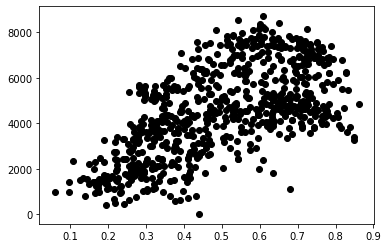

In [ ]:
plt.scatter(X, y, color='black')    # plot the dataset with scatterplot.
plt.show()

In [ ]:
# split the dataset into train/test.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print(X_test)

         temp
196  0.686667
187  0.750000
14   0.233333
31   0.192174
390  0.341667
..        ...
310  0.395000
21   0.059130
650  0.437500
424  0.344348
35   0.233333

[183 rows x 1 columns]


In [ ]:
regr = linear_model.LinearRegression()   # create a linear regression model.

In [ ]:
regr.fit(X_train, y_train)        # train the model using the training set.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regr.predict(X_test)      # make predictions using the testing set.

In [ ]:
accuracy = regr.score(X_test,y_test)
print(accuracy*100,'%')         # print the accuracy.

37.540464616240456 %


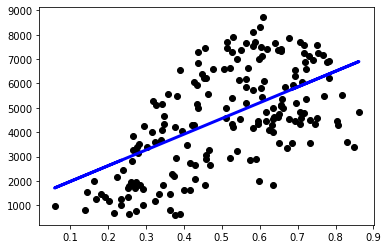

In [ ]:
plt.scatter(X_test, y_test,  color='black')         # plot the output.
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

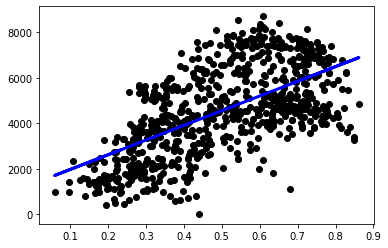

In [ ]:
plt.scatter(X, y,  color='black')              
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

**Plot the losss function over epochs**

In [ ]:
from sklearn.linear_model import SGDClassifier, SGDRegressor    # import the needed packages.
import sys
from io import StringIO

In [ ]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

-- Epoch 1
Norm: 33.90, NNZs: 1, Bias: 98.500000, T: 1, Avg. loss: 485112.500000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 64.01, NNZs: 1, Bias: 185.983258, T: 2, Avg. loss: 382666.025011
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 90.75, NNZs: 1, Bias: 263.681944, T: 3, Avg. loss: 301854.284724
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 114.50, NNZs: 1, Bias: 332.690412, T: 4, Avg. loss: 238108.437255
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 135.60, NNZs: 1, Bias: 393.980622, T: 5, Avg. loss: 187824.492682
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 154.33, NNZs: 1, Bias: 448.415823, T: 6, Avg. loss: 148159.554772
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 170.97, NNZs: 1, Bias: 496.762714, T: 7, Avg. loss: 116871.092565
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 185.75, NNZs: 1, Bias: 539.702242, T: 8, Avg. loss: 92190.154718
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 198.87, NNZs: 1, Bias: 577.839195, T: 9, Avg

In [ ]:
n = 1 ;             # number of instances.
fX = X[:n].values
fy = y[:n].values

In [ ]:
#learning_rate = 0.01   # perform the experiment each time with a differenet learning rate.
learning_rate = 0.1     # it seems that, for learning rate a = 0.1 the model has a better convergent.
#learning_rate = 1

sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=100,
                   average=False, random_state=2018, verbose=1)

In [ ]:
p_sum = [] ;        # this holds the sum of y-y_hat.
epochs = 15 ;       # number of epochs.
model = sgd.fit(fX, fy)                       
y = model.predict(fX)
p_sum.append(np.sum(fy-y))

In [ ]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
print(loss_history)
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

In [ ]:
print(model.coef_)

[303.08752891]


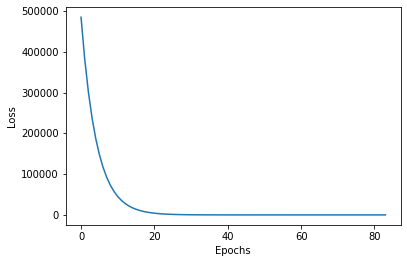

In [ ]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()